# Project 2 - COSC 528
## October 22, 2018
## Author: Ian R. Stewart

In [1]:
import pandas as pd
import numpy as np
import itertools
import tabulate
import warnings
warnings.filterwarnings("ignore")

# importing SVD library to extract PCs
from scipy.linalg import svd

# plotting libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data

In [2]:
df = pd.read_excel('UTK-peers.xlsx')

Dropping empty rows from imported file

In [3]:
first_row_with_all_NaN = df.shape[0]-df[df.isnull().all(axis=1) == True].shape[0]
df = df.loc[0:first_row_with_all_NaN-1]
df = df.set_index(df['Name'])
df.head()

,Name,IPEDS#,Carm R1,HBC,% Blk Total Students,% Hisp Total Students,2017 US News top 65,2014 Med School,Vet School,Total Enroll,...,ACT/ SAT 25%,ACT/ SAT 75%,(State/ Tuit)/ St. FTE,Med School Res $,Academic Support Expenditures,Student Services Expenditures,Endowment Figure,Endowment per Student FTE,Total Faculty.1,Total Tenure /Tenure-Track Facutly.1
Name,,,,,,,,,,,,,,,,,,,,,
Univ. of Tennessee - Knoxville,Univ. of Tennessee - Knoxville,221759.0,1.0,No,6.625965,3.404561,46.0,NaN,x,27845.0,...,24.0,30.0,22093.596931,0.0,7.827344e+08,30587.112868,7.827344e+08,30587.112868,1526.0,1117.0
Univ. of Georgia,Univ. of Georgia,139959.0,1.0,No,8.048713,4.732909,18.0,NaN,x,36130.0,...,25.0,30.0,23743.789087,0.0,9.390242e+08,27830.636107,9.390242e+08,27830.636107,1918.0,1606.0
Purdue Univ.,Purdue Univ.,243780.0,1.0,No,2.994663,4.128780,20.0,NaN,x,40472.0,...,23.0,30.0,25230.954999,0.0,2.445542e+09,66375.581533,2.445542e+09,66375.581533,1783.0,1700.0
Texas A&M Univ.,Texas A&M Univ.,228723.0,1.0,No,3.203109,19.193581,27.0,pre clin,x,63813.0,...,23.0,29.0,29423.418111,52058.0,1.052103e+10,180613.450122,1.052103e+10,180613.450122,2983.0,1995.0
Michigan State Univ.,Michigan State Univ.,171100.0,1.0,No,6.591080,4.020737,33.0,x,x,50538.0,...,23.0,28.0,22975.311112,52594.0,2.549137e+09,55180.107179,2.549137e+09,55180.107179,2616.0,1811.0


Dropping unique features from dataframe and large amounts of missing values.

In [4]:
df = df.drop(['IPEDS#','HBC','Carm R1','Med School Res $','AG Research ($000)','Med School Res $','Academic Support Expenditures','Profess Degrees'],axis=1)

Dropping indexs where multiple missing values within remaining data features.

In [5]:
df = df.drop(['Univ. of Pittsburgh ','Delaware','Univ. of Colorado '],axis=0)
df.shape

(54, 58)

Searching for features with missing or null values.

In [6]:
count = 0; indexes = []
for i in df.isnull().any():
    if i == True:
        indexes.append(count)
    count+=1
print df.columns.values[indexes]

[u'2014 Med School' u'Vet School' u'Endowment' u'Wall St. Jourl Rank'
 u'Enowment / St. FTE']


Inserting correct WSJ College Rankings from following reference: https://www.timeshighereducation.com/sites/default/files/breaking_news_files/wsj-the-college-rankings-2017-results.pdf

University with partial names, such 'Utah', were confirmed to be specific universities via the IPEDS number.

In [7]:
df['Wall St. Jourl Rank'][df['Name']=='Delaware']=137
df['Wall St. Jourl Rank'][df['Name']=='Colorado State']=353
df['Wall St. Jourl Rank'][df['Name']==' Arizona State']=131
df['Wall St. Jourl Rank'][df['Name']=='Georgia Tech']=51
df['Wall St. Jourl Rank'][df['Name']=='UC-Irvine']=153
df['Wall St. Jourl Rank'][df['Name']=='UC-San Diego']=49
df['Wall St. Jourl Rank'][df['Name']=='Connecticut']=110
df['Wall St. Jourl Rank'][df['Name']==' Iowa']=164
df['Wall St. Jourl Rank'][df['Name']=='Buffalo']=130
df['Wall St. Jourl Rank'][df['Name']=='Utah']=311
df['Wall St. Jourl Rank'][df['Name']=='UC-Riverside']=368
df['Wall St. Jourl Rank'][df['Name']==' Arizona']=162

In [8]:
df['2014 Med School'][df['2014 Med School']=='x']=1
df['2014 Med School'][df['2014 Med School']=='pre clin']=1
df['2014 Med School'][df['2014 Med School']!=int(1)]=0
df['Vet School'][df['Vet School']!='x']=0
df['Vet School'][df['Vet School']=='x']=1
df['Endowment'][df['Name']=='Clemson Univ.']=621.3E6

In [9]:
count = 0; indexes = []
for i in df.isnull().any():
    if i == True:
        indexes.append(count)
    count+=1
print 'Feautures with missing data: %s'%df.columns.values[indexes]

Feautures with missing data: [u'Enowment / St. FTE']


Error in feature label. Fixing typo of label "Enowment / St. FTE" to "Endowment / St. FTE"

In [10]:
df.rename(columns={"Enowment / St. FTE":"Endowment / St. FTE"},inplace=True)

Fixing NaN value in Endowment / St. FTE ; It should be noted that after checking the other values for this feature, the Endowment divided by St. FTE is *NOT* exactly the reported value in the provided data.

In [11]:
count = 0
for i in df["Endowment / St. FTE"]:
    j = str(i)
    if j == "nan":
        name = df['Name'][count]
        endowment = df['Endowment'][df['Name']==name]
        fte = df['ST. FTE'][df['Name']==name]
        df["Endowment / St. FTE"][df['Name']==name]=int(endowment / fte)
    count+=1

Re-verifying that all features have are filled with no missing data.

In [12]:
count = 0; indexes = []
for i in df.isnull().any():
    if i == True:
        indexes.append(count)
    count+=1
print 'Feautures with missing data: %s'%df.columns.values[indexes]

Feautures with missing data: []


Fixing data types on manipulated data feautures.

In [13]:
df['Name']=df['Name'].astype('|S')
df['Vet School']=df['Vet School'].astype(float)
df['2014 Med School']=df['2014 Med School'].astype(float)

Now that the data has been explored with appropriate handling of the unique features and missing data, let's create a data matrix containing soley the numeric attributes for analysis.

In [14]:
analysis = df.iloc[:,1::] # Essentially, we are only dropping the university name

In [15]:
analysis.shape

(54, 57)

Performed z-Standardization while mean-centering the data prior to analysis.

In [16]:
# Centering each data feature
a_standardized=(analysis.iloc[:,0::]-analysis.iloc[:,0::].mean())/analysis.iloc[:,0::].std()

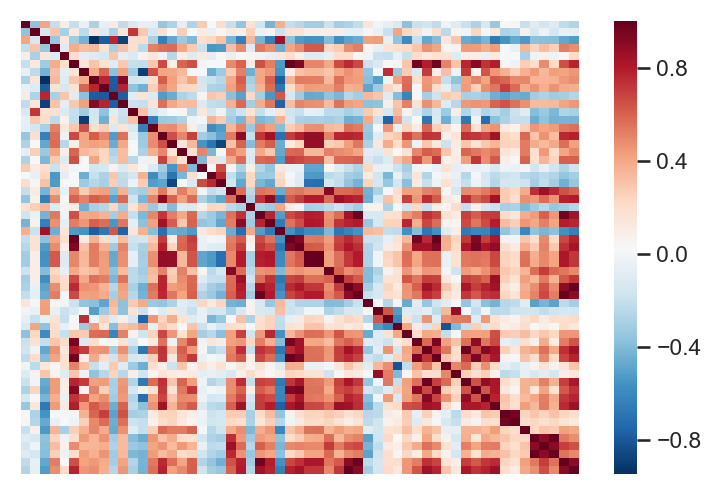

In [17]:
# Exploring correlation matrix
cols = list(a_standardized.columns.values)
corr = np.corrcoef(a_standardized.values.T)
plt.figure(dpi=150)
sns.set(font_scale=1.0)
sns.heatmap(corr,cbar=True,cmap="RdBu_r",yticklabels=[],xticklabels=[])

### **Analysis**

Finding factorized matrices from created analysis matrix. For the matrix **a_standardized** with (*57x54*), the expected sizes of the factorized matrices are as follows: **U**(*54x54*), **Sigma**(*54x54*), and **VT**(*57x57*). Of note, the package utilized here (SciPy.linalg.SVD) outputs a single column (57-length vector) for **Sigma**, which is actually a diagonal matrix and not a single column vector matrix. These values are known as the singular values of the original matrix **a_standardized**, while **U** and **VT** are referred to as the left-singular and right-singular vectors of **a_standardized**, respectively.

In [369]:
U, Sigma, VT = svd(a_standardized.values,full_matrices=False)
PCs = a_standardized.values.dot(VT.T)

In [370]:
# Verifying shape of SVD from SciPy.linalg.SVD function
U.shape,Sigma.shape,VT.shape

((54, 54), (54,), (54, 57))

Now that the matrix decomposition is complete, we must find the optimal threshold for the number of dimensions to retain. To assist in making this decision, we can create a Scree plot to visualize the data. Of note, the variance is calculated by squaring the singular values (i.e. values in **Sigma** vector).

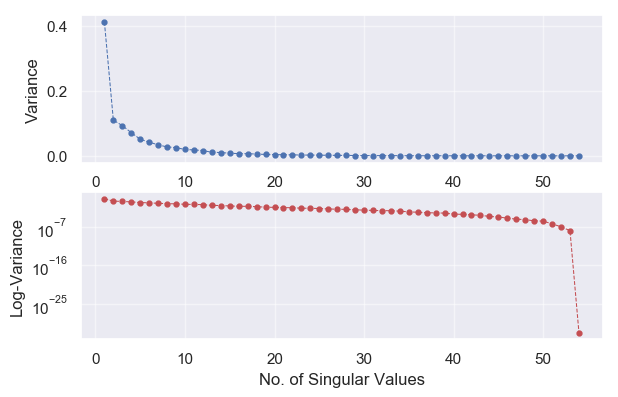

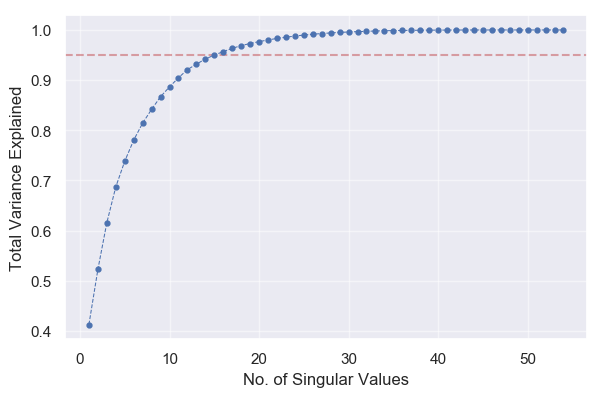

In [332]:
# Calc. Variance for each PC
variance_sigma = Sigma**2/np.sum(Sigma**2)

# Calc. Total Variance Explained for each PC step
PC_no = np.arange(1,len(variance_sigma)+1)
total_variance = []
for i in range(len(variance_sigma)):
    var = variance_sigma[i]
    if i == 0:
        total_variance.append(var)
    else:
        total_variance.append(total_variance[i-1]+var)

fig, (ax,ax1) = plt.subplots(nrows=2,dpi=100)
ax.plot(PC_no,variance_sigma,'o--',markersize=3.5,linewidth=0.75)
ax.grid(alpha=0.5)
ax.set_ylabel('Variance')
ax1.plot(PC_no,variance_sigma,'ro--',markersize=3.5,linewidth=0.75)
ax1.set_ylabel('Log-Variance')
ax1.set_xlabel('No. of Singular Values')
ax1.set_yscale('log')
ax1.grid(which='both',alpha=0.5)
#plt.savefig('/Users/i6o/Research/COSC 528/Project 2/Figures/Variance_Explained_Per_PC.png',format='png',dpi=600)

fig, ax = plt.subplots(dpi=100)
ax.plot(PC_no,total_variance,'o--',markersize=3.5,linewidth=0.75,zorder=2)
ax.grid(alpha=0.5)
ax.set_ylabel('Total Variance Explained')
ax.set_xlabel('No. of Singular Values')
plt.axhline(0.95,color='r',linestyle='--',alpha=0.5,zorder=1)
#plt.savefig('/Users/i6o/Research/COSC 528/Project 2/Figures/Total_Variance_Explained.png',format='png',dpi=600)

In [264]:
# Print Variance and Total Variance explained by each Principal Component (PC)
n = 20
print tabulate.tabulate({"P.C.": PC_no[0:n],"Variance Explained":total_variance[0:n],"P.C. Variance": variance_sigma[0:n]}, headers="keys")

  P.C.    P.C. Variance    Variance Explained
------  ---------------  --------------------
     1       0.412627                0.412627
     2       0.109848                0.522474
     3       0.0932738               0.615748
     4       0.0713672               0.687116
     5       0.0512241               0.73834
     6       0.0420141               0.780354
     7       0.0340335               0.814387
     8       0.0272946               0.841682
     9       0.0253092               0.866991
    10       0.0195205               0.886511
    11       0.0182155               0.904727
    12       0.0162219               0.920949
    13       0.0108676               0.931816
    14       0.0102284               0.942045
    15       0.00792793              0.949973
    16       0.00683807              0.956811
    17       0.00654667              0.963358
    18       0.005461                0.968819
    19       0.00419952              0.973018
    20       0.00374557            

Comparing results for Explained Variance for Singular Values and Scikit-Learn PCA function (only for ***comparison*** purposes!)

In [301]:
from sklearn.decomposition import PCA
n = 20
pca = PCA(n_components=n)
pca.fit(a_standardized)
print 'No.\tSVD Variance\tSVD Total\tPCA Total'
for i in range(0,n):
    if i == 0:
        print "%i\t%.2f %%\t\t%.2f %%\t\t%.2f %%"%(i+1,np.sum(variance_sigma[i])*100,variance_sigma[i]*100,np.sum(pca.explained_variance_ratio_[i]*100))
    else:
        print  "%i\t%.2f %%\t\t%.2f %%\t\t%.2f %%"%(i+1,variance_sigma[i]*100,np.sum(variance_sigma[0:i+1])*100,np.sum(pca.explained_variance_ratio_[0:i+1]*100))

No.	SVD Variance	SVD Total	PCA Total
1	41.26 %		41.26 %		41.26 %
2	10.98 %		52.25 %		52.25 %
3	9.33 %		61.57 %		61.57 %
4	7.14 %		68.71 %		68.71 %
5	5.12 %		73.83 %		73.83 %
6	4.20 %		78.04 %		78.04 %
7	3.40 %		81.44 %		81.44 %
8	2.73 %		84.17 %		84.17 %
9	2.53 %		86.70 %		86.70 %
10	1.95 %		88.65 %		88.65 %
11	1.82 %		90.47 %		90.47 %
12	1.62 %		92.09 %		92.09 %
13	1.09 %		93.18 %		93.18 %
14	1.02 %		94.20 %		94.20 %
15	0.79 %		95.00 %		95.00 %
16	0.68 %		95.68 %		95.68 %
17	0.65 %		96.34 %		96.34 %
18	0.55 %		96.88 %		96.88 %
19	0.42 %		97.30 %		97.30 %
20	0.37 %		97.68 %		97.68 %


In [368]:
a = np.array([[59,64,71],[75,80,55],[94,64,1],[44,36,74],[12,85,40]])
a = (a-np.mean(a,axis=0))/np.std(a,axis=0)
U_test,Sigma_test,VT_test = svd(a,full_matrices=False)
svd_var = np.cumsum(Sigma_test**2/np.sum(Sigma_test**2))
svd_transform = U_test*np.vstack(np.diag(Sigma_test),np.ones()

n = a.shape[1]
pca = PCA(n_components=n)
pca.fit(a)
print svd_var
print pca.explained_variance_ratio_
print'\n'
print svd_transform
print pca.transform(a)

[0.49523097 0.8684424  1.        ]
[0.49523097 0.37321142 0.1315576 ]


[[-0.63749441  0.17087215  0.56450712]
 [ 0.48855938 -0.22073715  0.9445083 ]
 [ 2.00049932  0.83913219 -0.49164215]
 [-1.65627258  1.10613871 -0.46767688]
 [-0.19529172 -1.8954059  -0.54969639]]
[[-0.63749441 -0.17087215  0.56450712]
 [ 0.48855938  0.22073715  0.9445083 ]
 [ 2.00049932 -0.83913219 -0.49164215]
 [-1.65627258 -1.10613871 -0.46767688]
 [-0.19529172  1.8954059  -0.54969639]]


In [421]:
#print U_test
print np.vstack((np.diag(Sigma_test),np.zeros((len(U_test)-len(Sigma_test),U_test.shape[1]))))
#print np.vstack((np.diag(Sigma_test),np.ones(len(U_test)-len(Sigma_test))))

[[2.72552098 0.         0.        ]
 [0.         2.36604551 0.        ]
 [0.         0.         1.40476475]]
[[2.72552098 0.         0.        ]
 [0.         2.36604551 0.        ]
 [0.         0.         1.40476475]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


array([[0., 0., 0.],
       [0., 0., 0.]])

From the results, the first 11 principal components capture ~90% of the total data variability.

 Now, writing a function to reduce the data matrix to the first *k* PCs determined by using the previous calculation to meet a specific percentage of the variance captured in the PCs.

In [426]:
def getValues(n,U_0,Sigma_0):
    '''
    @param n:           {int}   desired number of components
    @param V_transpose: {array} array matrix from SVD function
    return: original V function specified number of components
    '''
    Sigma_new = np.vstack((np.diag(Sigma_0),np.zeros((len(U_0)-len(Sigma_0),U_0.shape[1]))))
    X = U_0*Sigma_new
    return X[:,0:n]

Creating distance function for calculating inter- and intra-cluster distances 

In [427]:
def intercluster_distance(centroids):
    '''
    @param centroids: {dictionary} data cluster centroids from K_means class
    return {2}: tuple(cluster_i,cluster_j),distance(i_to_j)
    '''
    dist = []
    cl = []
    for i in list(itertools.combinations(range(len(centroids)), 2)):
        squared_distance = 0
        i0 = np.array(centroids[i[0]])
        i1 = np.array(centroids[i[1]])
        for j in range(len(i0)):
            squared_distance += (i0[j]-i1[j])**2
        cl.append(i)
        dist.append(np.sqrt(squared_distance))
    return cl,dist

def intracluster_distance(clusters):
    '''
    @param clusters: {dictionary} data cluster from K_means class
    return {1}: list(float(distance_between_points))
    '''
    cl = []
    dist = []
    for i in clusters:
        for j in list(itertools.combinations(range(len(clusters[i])), 2)): 
            squared_distance = 0
            j0 = np.array(clusters[i][j[0]])
            j1 = np.array(clusters[i][j[1]])
            for j in range(len(j0)):
                squared_distance += (j0[j]-j1[j])**2
            cl.append(i)
            dist.append(np.sqrt(squared_distance))
    return dist

### **Creating Class for** ***K-Means*** **Calculation on decomposed data**

In [428]:
class K_means:
    '''
    This do k_means on some foolish dataset that don't need no man bc it is iid and strong.
    e.g. 
        a = K_means(2) # Two clusters
        a.main(data)   # calc. clusters and centroids
        a.centroids    # cluster centroid values
        a.clusters     # values in clusters
    '''
    
    def __init__(self,k=3,tol=0.001,max_iter=1000):
        '''
        @param k:         {int}   number of clusters
        @param tol:       {float} convergence tolerance to stop iterations
        @param max_iter:  {float} maximum no. of iterations if not converged prior
        '''
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def dist(x,y,axis=1):
        print np.linalg.norm(x-y,axis)
        return np.linalg.norm(x-y,axis)
    
    def main(self,data):
        '''
        Decsription: Performing main function for K_mean algorithm.
            1. Initial guess for cluster centroids
            2. Initial number of cluster from provided <self.k> parameter
            3. Iterate over data:
                3.1. Calculate distance between current datum and cluster centroids
                3.2. Choose cluster with minimum distance between datum and centroid
                3.3. Update cluster centroid based on new data
                3.4. Continue to next datum in data
            4. return data clusters and centroids
            5. rerun process next iteration until convergence
                5.1. convergence 
        '''
        # Initializing centroids
        self.centroids = {}
        self.centroids_converged = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]      # Initial centroid guess
        
        # Iterate Data
        for i in range(self.max_iter):
            self.clusters = {}

            for j in range(self.k):
                self.clusters[j] = []

            # Calculating distance and choosing nearest class centroid
            for features in data:
                distances = [np.linalg.norm(features-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances)) # choosing cluster calc. minimum distance
                self.clusters[classification].append(features)   # choose closest centroid for feature
            
            old_values = dict(self.centroids) # Storing values for convergence testing

            for classification in self.clusters:
                self.centroids[classification] = np.average(self.clusters[classification], axis = 0)

            converged = True # boolean check value for convergence
            
            counter = 0
            for centroid in self.centroids:
                
                # Checking if difference between centroids meet defined tolerance value
                if np.sum((self.centroids[centroid]-old_values[centroid])/old_values[centroid]*100.0)>self.tol:
                    converged = False
                else:
                    self.centroids_converged = i
                counter+=1

            # If centroid calc. converged==True --> break loop
            if converged: 
                break
    

Initializing class object with number of clusters

In [429]:
data = getValues(2,U,Sigma) # Only using first two PCs

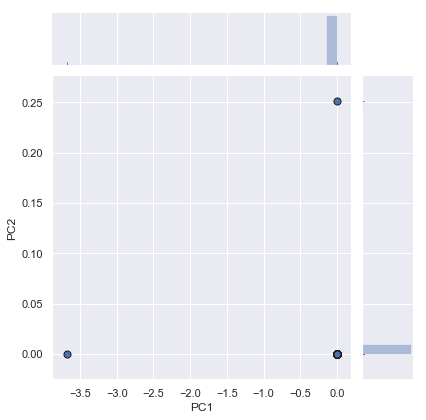

In [430]:
kmeans = K_means(1)
kmeans.main(data)
x=[];y=[]
for classification in kmeans.clusters:
    for features in kmeans.clusters[classification]:
        x.append(features[0]);y.append(features[1])
data = pd.DataFrame({
    'PC1': np.array(x),
    'PC2': np.array(y)})
h = sns.jointplot(x='PC1', y='PC2', data=data,\
                   marginal_kws=dict(bins=25, rug=True),\
                   s=50, edgecolor="k", linewidth=1)
#plt.savefig('C:\Users\IAN\Research\COSC 528\Project 2\Figures/PC2_jointplot.png',format='png',dpi=600)

For the sake of comparison, let's examine sklearn's PCA module for fitting the data.

In [398]:
U*Sigma

array([[-3.68356313e+00, -4.18633138e-01,  8.39024313e-01, ...,
        -2.99769076e-04, -4.59585502e-04,  9.63671720e-16],
       [-6.30685615e-01,  2.51378448e-01, -1.28389367e+00, ...,
         7.58547382e-05, -4.12706834e-04,  9.63671720e-16],
       [ 1.35808806e+00,  6.89749890e-01, -2.26530900e-01, ...,
        -4.44841949e-03,  4.98560362e-05,  9.63671720e-16],
       ...,
       [-1.03752737e+00,  3.00256827e-01,  6.39583479e+00, ...,
        -3.40491817e-03,  6.71840336e-05,  9.63671720e-16],
       [-6.85990609e+00, -5.86060492e-01, -4.67687238e+00, ...,
         3.75863827e-03, -5.85762975e-05,  9.63671720e-16],
       [-1.58486754e+00,  5.78163771e+00,  4.28058738e-01, ...,
        -1.90456676e-07, -4.14025026e-09,  9.63671720e-16]])

##### Creating plots for Two PCs clustering using the created K_means class.

In [397]:
X = U*Sigma
for i in range(1,4):
    kmeans = K_means(i)
    kmeans.main(X[:,0:2])
    
    c = ['b','g','r','c','m','y','k','w'] # python default plot colors for clusters
    fig,ax = plt.subplots(dpi=80)
    for classification in kmeans.clusters:
        color = c[classification]
        for features in kmeans.clusters[classification]:
            ax.scatter(features[0], features[1], color = color,s = 50,edgecolors='k',linewidth=0.5)

    for centroid in kmeans.centroids:
        legend_string = 'Cluster-%i Centroid'%centroid
        PC1 = kmeans.centroids[centroid][0]
        PC2 = kmeans.centroids[centroid][1]
        ax.scatter(PC1,PC2,s=200, marker="x",color=c[centroid],linewidth=2,label=legend_string)

    ax.grid(alpha=0.75)
    ax.set_axisbelow(True)
    ax.set_xlabel('PC1');ax.set_ylabel('PC2');
    ax.legend(loc='lower left',fancybox=True,shadow=True)
    #plt.savefig('/Users/i6o/Research/COSC 528/Project 2/Figures/'+'KMeans_Cluster_'+str(i)+'.png',format='png',dpi=200)
    print '%i-Clusters : Converged in %i iterations'%(i,kmeans.centroids_converged)
    

KeyError: 0

Checking intercluster and intracluster cluster distances to acquire the Dunn Index. Comparing results with *sklearn.cluster.KMeans* function.

In [385]:
from sklearn.cluster import KMeans
V = getValues(2,VT) # Only using first two PCs
kmeans_sklearn = KMeans(n_clusters=3, random_state=0).fit(V)
kmeans = K_means(3); kmeans.main(V)
print kmeans_sklearn.cluster_centers_
print kmeans.centroids

[[-0.06020894  0.11769154]
 [ 0.16527413  0.11821092]
 [ 0.1230435  -0.09809984]]
{0: array([ 0.1230435 , -0.09809984]), 1: array([0.16527413, 0.11821092]), 2: array([-0.06020894,  0.11769154])}


Elbow Method Calculation for Optimizing Number of Clusters for KMeans Algorithm.

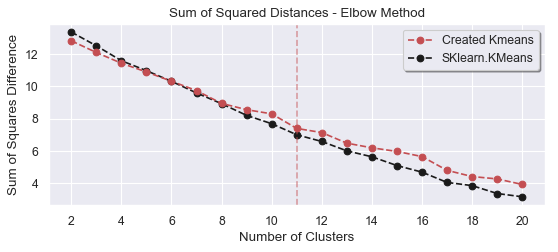

In [30]:
U, Sigma, VT = svd(a_standardized)
V = getValues(14,VT)
n = 21
n_clusters = np.array(range(2,n))
ss_values = []; ss_sklearn=[]
for i in n_clusters:
    kmeans = K_means(i)
    kmeans.main(V)
    sq=0
    ss = {}
    for i in kmeans.centroids:
        sq1=0
        centroid = kmeans.centroids[i]
        cluster_data = kmeans.clusters[i]
        for j in cluster_data:
            value = (np.array(j)-np.array(centroid))**2
            sq1+=sum(value)
            ss[i]=sq1
    ss_values.append(sum(ss.values()))
    kmeans_sklearn = KMeans(n_clusters=i, random_state=0).fit(V)
    ss_sklearn.append(kmeans_sklearn.inertia_)
    
fig,ax = plt.subplots(figsize=(8,3),dpi=80)
ax.plot(n_clusters,ss_values,'ro--',zorder=3,label = 'Created Kmeans')
ax.plot(n_clusters,ss_sklearn,'ko--',zorder=2,label = 'SKlearn.KMeans')
ax.set_xticks(n_clusters[::2])
ax.legend(loc='best',fancybox=True,shadow=True)
ax.set_ylabel('Sum of Squares Difference')
ax.set_xlabel('Number of Clusters')
ax.set_title('Sum of Squared Distances - Elbow Method')
ax.axvline(11,color='r',linestyle='--',alpha=0.5)

Min. intercluster: 0.3325
Max. intracluster: 0.8951
Dunn index: 0.2966


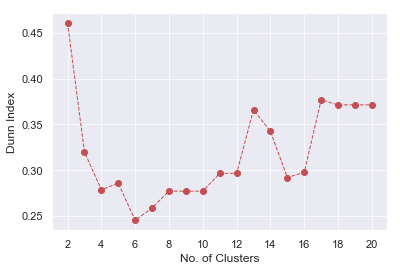

In [31]:
Dunn_index = {}
V = getValues(14,VT) # Only using first two PCs
for i in range(2,21):
    kmeans = K_means(i)
    kmeans.main(V)
    
    c,inter = intercluster_distance(kmeans.centroids)
    intra = intracluster_distance(kmeans.clusters)
    Dunn_index[i] = min(inter)/max(intra)

fig,ax = plt.subplots();
ax.plot(Dunn_index.keys(),Dunn_index.values(),'ro--',linewidth=1)
ax.set_xticks(Dunn_index.keys()[::2])
ax.set_xlabel('No. of Clusters')
ax.set_ylabel('Dunn Index')
ax.grid(alpha=0.75)
ax.axes.set_axisbelow(True)
print 'Min. intercluster: %.4f'%min(inter)
print 'Max. intracluster: %.4f'%max(intra)
print 'Dunn index: %.4f'%Dunn_index[11]

1
1
7
3
1
22
6
6
5
1
2
2


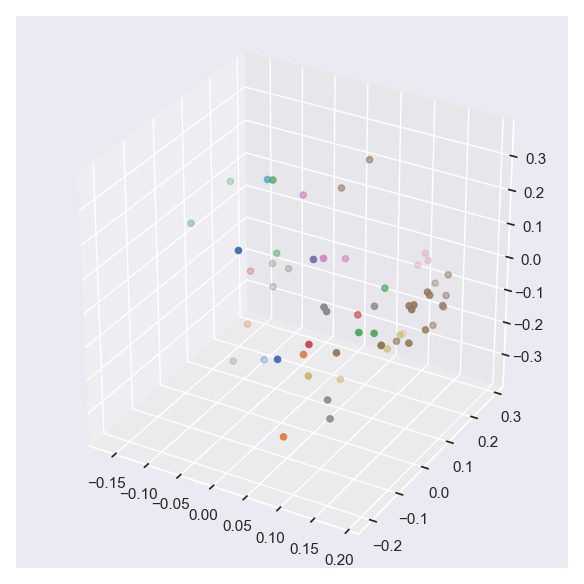

In [32]:
U, Sigma, VT = svd(a_standardized)
V = getValues(14,VT)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6),dpi=100)
ax = fig.add_subplot(111, projection='3d')

kmeans = K_means(12)
kmeans.main(V)

for classification in kmeans.clusters:
    x=[];y=[];z=[]
    for j in kmeans.clusters[classification]:
        x.append(j[0])
        y.append(j[1])
        z.append(j[2])
    print len(x)
    ax.scatter(x,y,z)
fig.tight_layout()
#plt.savefig('C:\Users\IAN\Research\COSC 528\Project 2\Figures/'+'KMeans_Cluster_'+str(i)+'.png',format='png',dpi=200)


### Expectation Maximization algorithm for Gaussian clusters

EM Algorithm implements a two-step approach. The first step, referred to as the *Expectation* step, attempts to maximize the likelihood of the observed values for the current iteration. The following step, called *Maximization* step, looks for new parameters values to maximize the likelihood function created in the *Expectation* step. For clustering problems, the *Expectation* step estimates the labels given the current data observed and *Maximization* step updates the estimates labels given the new likelihood function calculated in the *Expectation* step.

In [33]:
import math, random, copy
import numpy as np

def expectation_maximization(t, nbclusters=3, nbiter=3, normalize=False,\
        epsilon=0.001, monotony=False, datasetinit=True):
    """ 
    Each row of t is an observation, each column is a feature 
    'nbclusters' is the number of seeds and so of clusters
    'nbiter' is the number of iterations
    'epsilon' is the convergence bound/criterium

    Overview of the algorithm:
    -> Draw nbclusters sets of (μ, σ, P_{#cluster}) at random (Gaussian 
       Mixture) [P(Cluster=0) = P_0 = (1/n).∑_{obs} P(Cluster=0|obs)]
    -> Compute P(Cluster|obs) for each obs, this is:
    [E] P(Cluster=0|obs)^t = P(obs|Cluster=0)*P(Cluster=0)^t
    -> Recalculate the mixture parameters with the new estimate
    [M] * P(Cluster=0)^{t+1} = (1/n).∑_{obs} P(Cluster=0|obs)
        * μ^{t+1}_0 = ∑_{obs} obs.P(Cluster=0|obs) / P_0
        * σ^{t+1}_0 = ∑_{obs} P(Cluster=0|obs)(obs-μ^{t+1}_0)^2 / P_0
    -> Compute E_t=∑_{obs} log(P(obs)^t)
       Repeat Steps 2 and 3 until |E_t - E_{t-1}| < ε
    """
    def pnorm(x, m, s):
        """ 
        Compute the multivariate normal distribution with values vector x,
        mean vector m, sigma (variances/covariances) matrix s
        """
        xmt = np.matrix(x-m).transpose()
        for i in xrange(len(s)):
            if s[i,i] <= sys.float_info[3]: # min float
                s[i,i] = sys.float_info[3]
        sinv = np.linalg.inv(s)
        xm = np.matrix(x-m)
        return (2.0*np.pi)**(-len(x)/2.0)*(1.0/np.sqrt(np.linalg.det(s)))\
                *np.exp(-0.5*(xm*sinv*xmt))

    def draw_params():
            if datasetinit:
                tmpmu = np.array([1.0*t[random.uniform(0,nbobs),:]],np.float64)
            else:
                tmpmu = np.array([random.uniform(min_max[f][0], min_max[f][1])\
                        for f in xrange(nbfeatures)], np.float64)
            return {'mu': tmpmu,\
                    'sigma': np.matrix(np.diag(\
                    [(min_max[f][1]-min_max[f][0])/2.0\
                    for f in xrange(nbfeatures)])),\
                    'proba': 1.0/nbclusters}

    nbobs,nbfeatures = t.shape
    min_max = []
    # find xranges for each features
    for f in xrange(nbfeatures):
        min_max.append((t[:,f].min(), t[:,f].max()))
    
    ### Normalization
    if normalize:
        for f in xrange(nbfeatures):
            t[:,f] -= min_max[f][0]
            t[:,f] /= (min_max[f][1]-min_max[f][0])
    min_max = []
    for f in xrange(nbfeatures):
        min_max.append((t[:,f].min(), t[:,f].max()))
    ### /Normalization

    result = {}
    quality = 0.0 # sum of the means of the distances to centroids
    random.seed()
    Pclust = np.ndarray([nbobs,nbclusters], np.float64) # P(clust|obs)
    Px = np.ndarray([nbobs,nbclusters], np.float64) # P(obs|clust)
    # iterate nbiter times searching for the best "quality" clustering
    for iteration in xrange(nbiter):
        ##############################################
        # Step 1: draw nbclusters sets of parameters #
        ##############################################
        params = [draw_params() for c in xrange(nbclusters)]
        old_log_estimate = sys.maxint         # init, not true/real
        log_estimate = sys.maxint/2 + epsilon # init, not true/real
        estimation_round = 0
        # Iterate until convergence (EM is monotone) <=> < epsilon variation
        while (abs(log_estimate - old_log_estimate) > epsilon\
                and (not monotony or log_estimate < old_log_estimate)):
            restart = False
            old_log_estimate = log_estimate
            ########################################################
            # Step 2: compute P(Cluster|obs) for each observations #
            ########################################################
            for o in xrange(nbobs):
                for c in xrange(nbclusters):
                    # Px[o,c] = P(x|c)
                    Px[o,c] = pnorm(t[o,:],\
                            params[c]['mu'], params[c]['sigma'])
            #for o in xrange(nbobs):
            #    Px[o,:] /= math.fsum(Px[o,:])
            for o in xrange(nbobs):
                for c in xrange(nbclusters):
                    # Pclust[o,c] = P(c|x)
                    Pclust[o,c] = Px[o,c]*params[c]['proba']
            #    assert math.fsum(Px[o,:]) >= 0.99 and\
            #            math.fsum(Px[o,:]) <= 1.01
            for o in xrange(nbobs):
                tmpSum = 0.0
                for c in xrange(nbclusters):
                    tmpSum += params[c]['proba']*Px[o,c]
                Pclust[o,:] /= tmpSum
                #assert math.fsum(Pclust[:,c]) >= 0.99 and\
                #        math.fsum(Pclust[:,c]) <= 1.01
            ###########################################################
            # Step 3: update the parameters (sets {mu, sigma, proba}) #
            ###########################################################
            print "iter:", iteration, " estimation#:", estimation_round,\
                    " params:", params
            for c in xrange(nbclusters):
                tmpSum = math.fsum(Pclust[:,c])
                params[c]['proba'] = tmpSum/nbobs
                if params[c]['proba'] <= 1.0/nbobs:           # restart if all
                    restart = True                             # converges to
                    print "Restarting, p:",params[c]['proba'] # one cluster
                    break
                m = np.zeros(nbfeatures, np.float64)
                for o in xrange(nbobs):
                    m += t[o,:]*Pclust[o,c]
                params[c]['mu'] = m/tmpSum
                s = np.matrix(np.diag(np.zeros(nbfeatures, np.float64)))
                for o in xrange(nbobs):
                    s += Pclust[o,c]*(np.matrix(t[o,:]-params[c]['mu']).transpose()*\
                            np.matrix(t[o,:]-params[c]['mu']))
                    #print ">>>> ", t[o,:]-params[c]['mu']
                    #diag = Pclust[o,c]*((t[o,:]-params[c]['mu'])*\
                    #        (t[o,:]-params[c]['mu']).transpose())
                    #print ">>> ", diag
                    #for i in xrange(len(s)) :
                    #    s[i,i] += diag[i]
                params[c]['sigma'] = s/tmpSum
                print "------------------"
                print params[c]['sigma']

            ### Test bound conditions and restart consequently if needed
            if not restart:
                restart = True
                for c in xrange(1,nbclusters):
                    if not np.allclose(params[c]['mu'], params[c-1]['mu'])\
                    or not np.allclose(params[c]['sigma'], params[c-1]['sigma']):
                        restart = False
                        break
            if restart:                # restart if all converges to only
                old_log_estimate = sys.maxint          # init, not true/real
                log_estimate = sys.maxint/2 + epsilon # init, not true/real
                params = [draw_params() for c in xrange(nbclusters)]
                continue
            ### /Test bound conditions and restart

            ####################################
            # Step 4: compute the log estimate #
            ####################################
            log_estimate = math.fsum([math.log(math.fsum(\
                    [Px[o,c]*params[c]['proba'] for c in xrange(nbclusters)]))\
                    for o in xrange(nbobs)])
            print "(EM) old and new log estimate: ",\
                    old_log_estimate, log_estimate
            estimation_round += 1

        # Pick/save the best clustering as the final result
        quality = -log_estimate
        if not quality in result or quality > result['quality']:
            result['quality'] = quality
            result['params'] = copy.deepcopy(params)
            result['clusters'] = [[o for o in xrange(nbobs)\
                    if Px[o,c] == max(Px[o,:])]\
                    for c in xrange(nbclusters)]
    return result

In [34]:
#   Tests

In [154]:
from scipy.stats import multivariate_normal
class EM_GMM:
    def __init__(self,data,n_clusters,iterations):
        self.iterations = iterations
        self.n_clusters = n_clusters
        self.data = data
        self.mean = None
        self.pi = None
        self.coveraince = None
        self.dataY = None
        self.clusters = {}
        
        
    def main(self):
        self.reg_cov = 1e-6*np.identity(len(self.data[0]))
        x,y = np.meshgrid(np.sort(self.data[:,0]),np.sort(self.data[:,1]))
        self.dataY = np.array([x.flatten(),y.flatten()]).T
        for i in range(n_clusters):
            self.clusters[i]=[]
                     
        """ 1. Set the initial mu, covariance and pi values"""
        self.mean = np.random.uniform(min(self.data[:,0]),max(self.data[:,0]),size=(self.n_clusters,len(self.data[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.coveraince = np.zeros((self.n_clusters,len(self.data[0]),len(self.data[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.coveraince)):
            np.fill_diagonal(self.coveraince[dim],0.001)
        self.pi = np.ones(self.n_clusters)/self.n_clusters # Are "Fractions"
        log_likelihoods = [] 
        '''
        """Plot the initial state"""    
        fig = plt.figure(figsize=(4,4))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.data[:,0],self.data[:,1])
        ax0.set_title('Initial state')
        for m,c in zip(self.mean,self.coveraince):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax0.contour(np.sort(self.data[:,0]),np.sort(self.data[:,1]),multi_normal.pdf(self.dataY).reshape(len(self.data),len(self.data)),colors='black',alpha=0.3)
            ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        '''
        for i in range(self.iterations):
            
            """Expectation Step"""
            r_ic = np.zeros((len(self.data),len(self.coveraince)))
            
            for m,co,p,r in zip(self.mean,self.coveraince,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                num = p*mn.pdf(self.data)
                summed = np.array([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(self.data) for pi_c,mu_c,cov_c in zip(self.pi,self.mean,self.coveraince+self.reg_cov)])
                den = np.sum(summed,axis=0)
                r_ic[:,r] = num/den
                
            """
            The above calculation of r_ic is not that obvious why I want to quickly derive what we have done above.
            First of all the nominator:
            We calculate for each source c which is defined by m,co and p for every instance x_i, the multivariate_normal.pdf() value.
            For each loop this gives us a 100x1 matrix (This value divided by the denominator is then assigned to r_ic[:,r] which is in 
            the end a 100x3 matrix).
            Second the denominator:
            What we do here is, we calculate the multivariate_normal.pdf() for every instance x_i for every source c which is defined by
            pi_c, mu_c, and cov_c and write this into a list. This gives us a 3x100 matrix where we have 100 entrances per source c.
            Now the formula wants us to add up the pdf() values given by the 3 sources for each x_i. Hence we sum up this list over axis=0.
            This gives us then a list with 100 entries.
            What we have now is FOR EACH LOOP a list with 100 entries in the nominator and a list with 100 entries in the denominator
            where each element is the pdf per class c for each instance x_i (nominator) respectively the summed pdf's of classes c for each 
            instance x_i. Consequently we can now divide the nominator by the denominator and have as result a list with 100 elements which we
            can then assign to r_ic[:,r] --> One row r per source c. In the end after we have done this for all three sources (three loops)
            and run from r==0 to r==2 we get a matrix with dimensionallity 100x3 which is exactly what we want.
            If we check the entries of r_ic we see that there mostly one element which is much larger than the other two. This is because
            every instance x_i is much closer to one of the three gaussians (that is, much more likely to come from this gaussian) than
            it is to the other two. That is practically speaing, r_ic gives us the fraction of the probability that x_i belongs to class
            c over the probability that x_i belonges to any of the classes c (Probability that x_i occurs given the 3 Gaussians).
            """
            
            """Maximization Step"""
            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mean = []
            self.coveraince = []
            self.pi = []
            log_likelihood = []
            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.data*r_ic[:,c].reshape(len(self.data),1),axis=0)
                self.mean.append(mu_c)
                # Calculate the covariance matrix per source based on the new mean
                self.coveraince.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.data),1)*(self.data-mu_c)).T,(self.data-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic)) # Here np.sum(r_ic) gives as result the number of instances. This is logical since we know 
                                                # that the columns of each row of r_ic adds up to 1. Since we add up all elements, we sum up all
                                                # columns per row which gives 1 and then all rows which gives then the number of instances (rows) 
                                                # in X --> Since pi_new contains the fractions of datapoints, assigned to the sources c,
                                                # The elements in pi_new must add up to 1
            
            
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mean[i],self.coveraince[j]).pdf(self.data) for k,i,j in zip(self.pi,range(len(self.mean)),range(len(self.coveraince)))])))
            
            """
            This process of E step followed by a M step is now iterated a number of n times. In the second step for instance,
            we use the calculated pi_new, mu_new and cov_new to calculate the new r_ic which are then used in the second M step
            to calculate the mu_new2 and cov_new2 and so on....
            """
        fig2 = plt.figure(figsize=(4,4))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods,'o--',markersize=8,linewidth=2)
        plt.show()
    
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # Plot the point onto the fittet gaussians
        fig3 = plt.figure(figsize=(10,10))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.data[:,0],self.data[:,1])
        for m,c in zip(self.mean,self.coveraince):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax2.contour(np.sort(self.data[:,0]),np.sort(self.data[:,1]),multi_normal.pdf(self.dataY).reshape(len(self.data),len(self.data)),colors='red',alpha=0.25)
            ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mean,self.coveraince):  
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mean,self.coveraince)]))
        plt.show()
        return prediction

In [155]:
gmm = EM_GMM(V,2,50)

AttributeError: EM_GMM instance has no attribute 'clu'

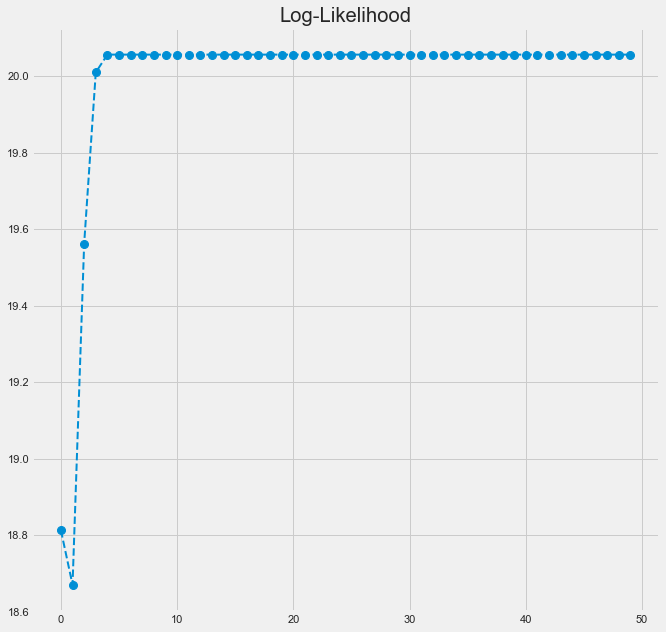

In [152]:
gmm.main()